<a href="https://colab.research.google.com/github/Sandermi99/MEDT4165/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Exercise 2 part 1 and 2!

In [2]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [3]:
#Part 1- Transmission

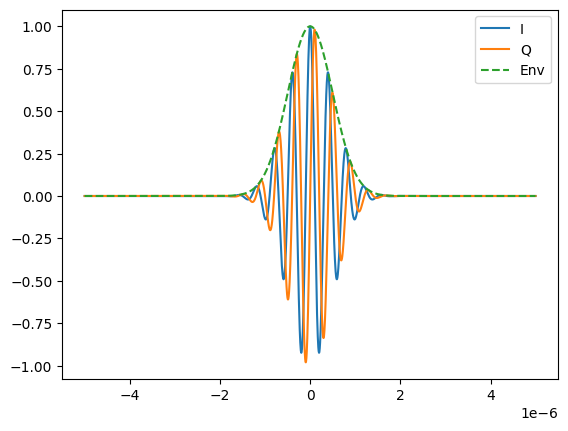

In [4]:


#Defining variables

fs = 250e6
f0 = 2.5e6
bw = 0.3
bw_abs = f0*bw
T = 10e-6
N = int(T*fs)
t_vec = (np.arange(N) - N/2) / fs

#Generating the gauss pulse and plotting it

i, q, e = signal.gausspulse(t_vec, bw=bw, fc=f0, retquad = True, retenv = True)

plt.plot(t_vec, i, label = "I")
plt.plot(t_vec, q,label = "Q")
plt.plot(t_vec, e, "--" ,label = "Env")
plt.legend()
plt.show()



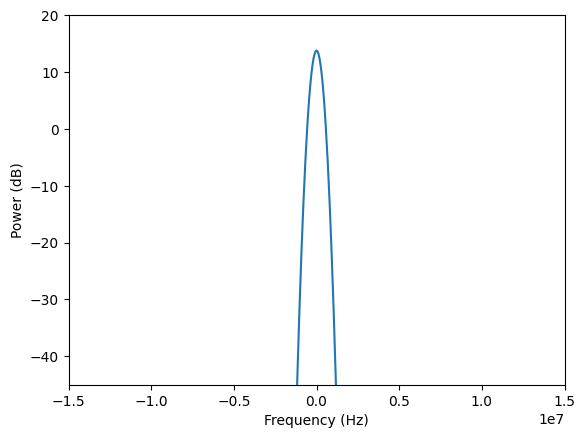

In [7]:
# Power spectrum of the gaussian pulse

Nfft = 4096
Y = np.fft.fft(e, Nfft)
Ps_Y = (1/Nfft) * np.abs(Y)**2
Ps_Y_shiftet = np.fft.fftshift(Ps_Y)
Ps_Y_shiftet_dB = 10*np.log10(Ps_Y_shiftet + 1e-12)
f = np.fft.fftshift(np.fft.fftfreq(Nfft, 1/fs))

plt.plot(f, Ps_Y_shiftet_dB)
plt.ylabel("Power (dB)")
plt.xlabel("Frequency (Hz)")
plt.ylim(-45, 20)
plt.xlim(-15e6, 15e6)
plt.show()

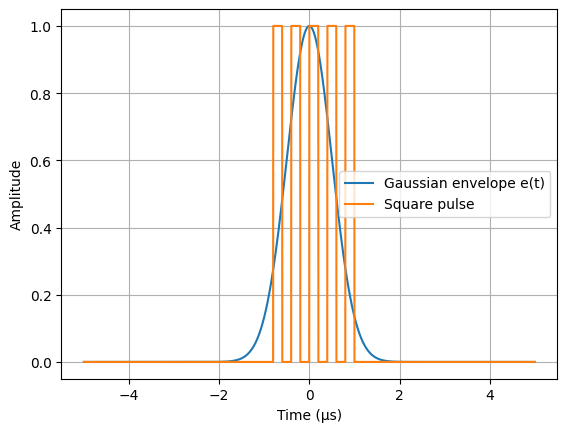

In [16]:
# Generating a square wave
# Square pulse length in samples: use same T as Gaussian
N_sq = N
t_sq = t_vec # already centered around 0

pulse_width = 2e-6
window = np.zeros_like(t_vec)
window[np.abs(t_vec) <= pulse_width/2] = 1
y_square = (signal.square(2*np.pi*f0*t_sq)+1)/2
y_squared_windowed = y_square * window

plt.figure()
plt.plot(t_vec*1e6, e, label="Gaussian envelope e(t)") # or plot i / q if you want
plt.plot(t_vec*1e6, y_squared_windowed, label="Square pulse")
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

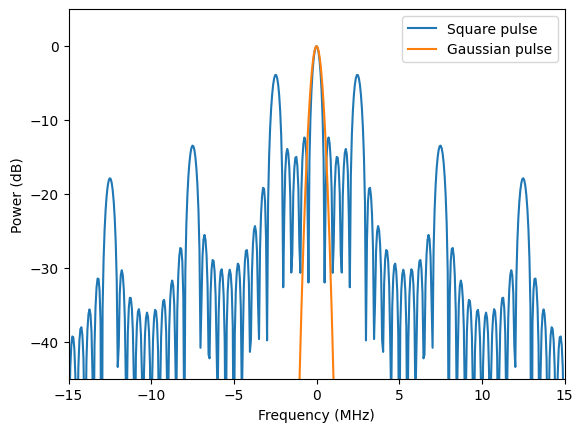

In [33]:
Nfft = 4096
Y_square = np.fft.fft(y_squared_windowed, Nfft)

Ps_Y_square = (1/Nfft) * np.abs(Y_square)**2
Ps_Y_square_shiftet = np.fft.fftshift(Ps_Y_square)
Ps_Y_normalized = Ps_Y_square_shiftet/np.max(Ps_Y_square_shiftet)
Ps_gauss_normalized = Ps_Y_shiftet/np.max(Ps_Y_shiftet)
Ps_Y_square_shiftet_dB = 10*np.log10(Ps_Y_normalized + 1e-12)
Ps_gauss_shifted_dB = 10*np.log10(Ps_gauss_normalized + 1e-12)


plt.figure()

plt.plot(f/1e6, Ps_Y_square_shiftet_dB, label="Square pulse")
plt.plot(f/1e6, Ps_gauss_shifted_dB, label="Gaussian pulse")
plt.ylabel("Power (dB)")
plt.xlabel("Frequency (MHz)")
plt.ylim(-45, 5)
plt.xlim(-15, 15)
plt.legend()
plt.show()

In [ ]:
#The main difference one can observe in the plot is that the gaussian pulse spectrum has one main lobe centered
# At 0Hz while the square wave has a main lobe also, but also contains side lobes in +- f0, 3f0, 5f0....

In [34]:
#SPL(Spatial pulse length) of gaussian

c = 1540  # m/s

env = np.abs(e)
env = env / np.max(env)

half = 0.5
idx_max = np.argmax(env)

# indices where envelope is above half-max
above = np.where(env >= half)[0]

i_left = above[0]
i_right = above[-1]

t_left = t_vec[i_left]
t_right = t_vec[i_right]

FWHM_time = t_right - t_left  # seconds

SPL_mm = (c * FWHM_time) * 1e3            # one-way spatial pulse length
radial_res_mm = (c * FWHM_time / 2) * 1e3 # axial/radial resolution (round-trip)

print(f"FWHM time: {FWHM_time*1e6:.3f} µs")
print(f"SPL: {SPL_mm:.3f} mm")
print(f"Radial (axial) resolution: {radial_res_mm:.3f} mm")




FWHM time: 1.168 µs
SPL: 1.799 mm
Radial (axial) resolution: 0.899 mm
